<a href="https://colab.research.google.com/github/dev02chandan/Deep-Learning-/blob/main/Face_Recognition_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Aim: 
    The objective is to try to implement the basics of face recognition using Deep Learning. 
    This project also includes digital make_up and face similarity matching as applications towards the end of the project.

## Imports

In [5]:
import PIL.Image
import PIL.ImageDraw
'''
PIL is the Python Image Library 
We can easily draw the image
We will use it to display the results of the face detection 
'''

'\nPIL is the Python Image Library \nWe can easily draw the image\nWe will use it to display the results of the face detection \n'

In [6]:
!pip install dlib
import dlib
!pip3 install face_recognition
import face_recognition

     |████████████████████████████████| 100.1 MB 26 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=7e0a96cb629c51bbd4330faa9d1796547ffa4b84e727d7fc05ff3670d8acdd15
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


## Face Detection

In [79]:
image = face_recognition.load_image_file("/content/people.jpg")

In [80]:
face_locations = face_recognition.face_locations(image)

In [81]:
number_of_faces = len(face_locations)

In [82]:
print("There are {} faces in the image given.".format(number_of_faces))

There are 6 faces in the image given.


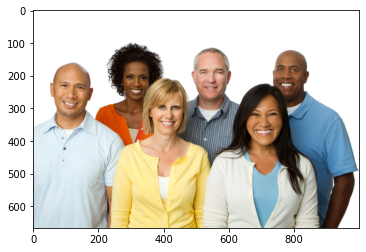

In [83]:
import matplotlib.pyplot as plt
plt.imshow(image, vmin = 0, vmax = 255)

In [84]:
pil_image = PIL.Image.fromarray(image)
# Load the image into a Python Image Library object so that we can draw on top of it and display it
# PIL Image object

A face is located at pixel location Top: 163, Right: 605, Bottom: 271, Left: 497
A face is located at pixel location Top: 186, Right: 364, Bottom: 275, Left: 275
A face is located at pixel location Top: 211, Right: 175, Bottom: 319, Left: 67
A face is located at pixel location Top: 295, Right: 760, Bottom: 402, Left: 653
A face is located at pixel location Top: 271, Right: 474, Bottom: 378, Left: 366
A face is located at pixel location Top: 152, Right: 832, Bottom: 259, Left: 724


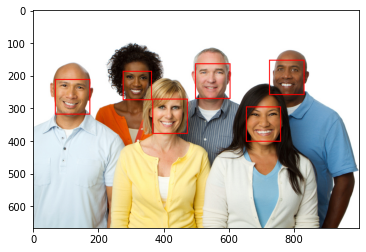

In [86]:
for face_location in face_locations:
    # Print the location of each face in this image. Each face is a list of co-ordinates in (top, right, bottom, left) order.
    top, right , bottom , left = face_location
    print("A face is located at pixel location Top: {}, Right: {}, Bottom: {}, Left: {}".format(top, right, bottom,left))

    # Drawing on top of images
    draw = PIL.ImageDraw.Draw(pil_image)
    draw.rectangle([left, top, right, bottom], outline='red', width=3)

plt.imshow(pil_image)

## Face Landmarks

In [88]:
face_landmarks_list = face_recognition.face_landmarks(image)
# Getting the landmarks of each face in a list format (all facial features)
# One entry for each face found in the image
# Each face is a python dictionary object 
# keys are the facial features - like 'left eye' , 'right eye' and all
# Values for each key - list of x,y coordinates of the points that correspond to that facial feature

In [89]:
face_landmarks_list[0]['bottom_lip']

[(565, 237),
 (558, 243),
 (550, 246),
 (545, 246),
 (539, 245),
 (532, 242),
 (526, 236),
 (528, 236),
 (539, 240),
 (545, 241),
 (551, 241),
 (563, 237)]

In [90]:
pil_image = PIL.Image.fromarray(image)
draw = PIL.ImageDraw.Draw(pil_image)

The chin in the face has the following points: [(497, 193), (498, 206), (499, 219), (500, 232), (504, 244), (512, 255), (521, 264), (532, 271), (544, 274), (557, 272), (569, 266), (579, 258), (588, 247), (593, 234), (596, 221), (597, 208), (598, 194)]
The left_eyebrow in the face has the following points: [(508, 186), (514, 182), (520, 179), (528, 179), (536, 181)]
The right_eyebrow in the face has the following points: [(558, 180), (566, 179), (574, 179), (582, 180), (588, 186)]
The nose_bridge in the face has the following points: [(547, 191), (546, 200), (546, 208), (545, 217)]
The nose_tip in the face has the following points: [(536, 221), (541, 223), (546, 225), (551, 223), (556, 221)]
The left_eye in the face has the following points: [(517, 193), (522, 190), (528, 190), (533, 193), (527, 194), (522, 194)]
The right_eye in the face has the following points: [(562, 193), (567, 190), (573, 190), (578, 193), (573, 194), (567, 194)]
The top_lip in the face has the following points: [

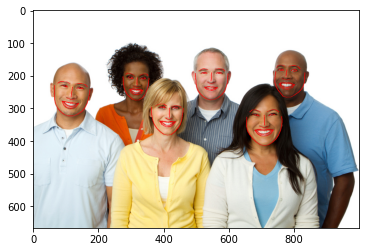

In [91]:
# Loop over each face
for face_landmark in face_landmarks_list:

    # Loop for every facial feature (eyes, nose, mouth, lips, etc.)
    # list_of_points is the list of points for every single feature
    for name, list_of_points in face_landmark.items():
        # print out the raw values
        print("The {} in the face has the following points: {}".format(name, list_of_points))

        # Now draw a line representing the facial feature that we found
        # fill for line colour and width of the line in pixels (width)
        draw.line(list_of_points, fill="red", width=2)

plt.imshow(pil_image)

## Face Encodings

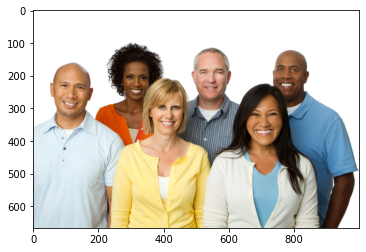

In [21]:
plt.imshow(image, vmin = 0, vmax = 255)

In [22]:
image = face_recognition.load_image_file("person.jpg")

In [23]:
# Generating the Face Encodings
# 1. Locating the face in the Image
# 2. Finding all the facial features for that face
# 3. Aligning the image 
# 4. Processing the Image with the pre-trained face-encoding neural network
# This is all done with one line of code = with the face recognition library 
# Because it is a very common operation
face_encodings = face_recognition.face_encodings(image)

# Result is an array which has one element for each face found in the image
# Each element is another array of 128 elements

In [24]:
if len(face_encodings)==0:
    print("No faces were found.")

# Reason: 
# 1. No faces were there 
# 2. Sometimes it cannot find the faces even when the faces are there
    # either the face is too small to detect
    # Or there is something wrong with the image data itself

In [25]:
# Hence atleast one face was found
first_face_encoding = face_encodings[0]
first_face_encoding

array([-0.20855851,  0.01845224,  0.05200066, -0.01912927, -0.02748835,
       -0.01855115, -0.02725497, -0.0184503 ,  0.19835585, -0.0112457 ,
        0.19645664,  0.0160067 , -0.15621796, -0.08862408, -0.00915148,
        0.11604425, -0.12597211, -0.14229296, -0.03572806, -0.03505833,
        0.03726118,  0.03980888, -0.07782647,  0.07926027, -0.14744228,
       -0.3470616 , -0.10856146, -0.12216781,  0.01723715, -0.11650665,
        0.06511284, -0.03900211, -0.18297049, -0.10930697,  0.06847559,
        0.12637652, -0.05037969, -0.09572248,  0.13429841, -0.00703449,
       -0.16005872, -0.05573067,  0.08435321,  0.27441847,  0.13435344,
        0.08523722,  0.00496128, -0.11246416,  0.16313235, -0.27373844,
        0.08402453,  0.10128954,  0.15344827,  0.10832103,  0.11609219,
       -0.09201843,  0.07474768,  0.25488392, -0.30816695,  0.10207553,
        0.00198595, -0.01495537,  0.03411685, -0.02620055,  0.21705674,
        0.14441346, -0.11093327, -0.12751678,  0.17208101, -0.16

In [26]:
# These are 128 values that uniquely represent the face
# Another picture of the same person should give us values which are very close to but not exactly the same values 
# Whereas picture of a different person should give us values not close at all

## Facial Recognition

In [28]:
# Loading all the images
image_of_person_1 = face_recognition.load_image_file("person_1.jpg")
image_of_person_2 = face_recognition.load_image_file("person_2.jpg")
image_of_person_3 = face_recognition.load_image_file("person_3.jpg")

Text(0.5, 1.0, 'Image of Person 3')

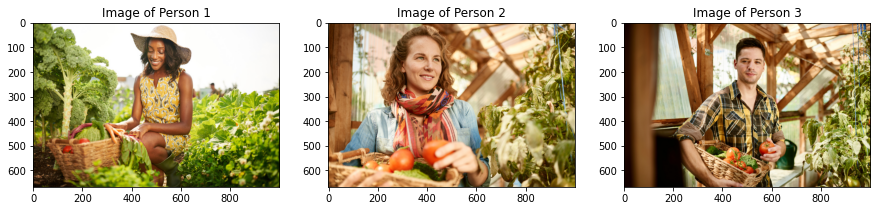

In [29]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(image_of_person_1)
plt.title("Image of Person 1")

plt.subplot(1,3,2)
plt.imshow(image_of_person_2)
plt.title("Image of Person 2")

plt.subplot(1,3,3)
plt.imshow(image_of_person_3)
plt.title("Image of Person 3")

In [30]:
# Get the face encoding of each person. This can fail if no one is found in the photo.
# We added index 0 for this case because we know that this image contanins only one face
person_1_face_encoding = face_recognition.face_encodings(image_of_person_1)[0]
person_2_face_encoding = face_recognition.face_encodings(image_of_person_2)[0]
person_3_face_encoding = face_recognition.face_encodings(image_of_person_3)[0]


In [31]:
# Put all three face encodings in an array 
known_face_encodings = [
    person_1_face_encoding,
    person_2_face_encoding,
    person_3_face_encoding
]

In [32]:
# Loading the image that we want to check
unknown_image = face_recognition.load_image_file("unknown_8.jpg")

Text(0.5, 1.0, 'Unknown Image')

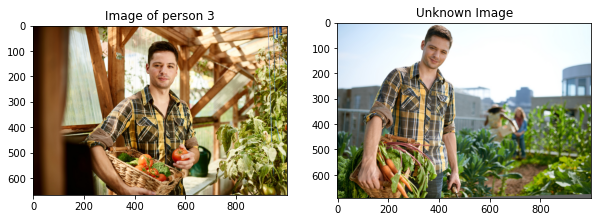

In [33]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_of_person_3)
plt.title("Image of person 3")

plt.subplot(1,2,2)
plt.imshow(unknown_image)
plt.title("Unknown Image")

In [34]:
# Get the face encodings in the picture
unknown_face_encodings = face_recognition.face_encodings(unknown_image)

In [35]:
# There might be more than one person in the photo, so we need to loop over each face we found
for unknown_face_encoding in unknown_face_encodings:

    # Test if this unknown face encoding matches any of the three people we know
    results = face_recognition.compare_faces(known_face_encodings, unknown_face_encoding, tolerance=0.6)
    # This will give an array which only has bool values 

    name = "Unknown"

    if results[0]:
        name = "Person 1"

    elif results[1]:
        name = "Person 2"

    elif results[2]:
        name = "Person 3"

    print(f"Found {name} in the photo!")


Found Person 3 in the photo!


In [36]:
unknown_image1 = face_recognition.load_image_file("unknown_1.jpg")
unknown_image2 = face_recognition.load_image_file("unknown_2.jpg")
unknown_image3 = face_recognition.load_image_file("unknown_3.jpg")
unknown_image4 = face_recognition.load_image_file("unknown_4.jpg")
unknown_image5 = face_recognition.load_image_file("unknown_5.jpg")
unknown_image6 = face_recognition.load_image_file("unknown_6.jpg")
unknown_image7 = face_recognition.load_image_file("unknown_7.jpg")

In [37]:
def MatchFace(image, known_face_encodings, image1, image2, image3):
    unknown_face_encoding1 = face_recognition.face_encodings(image)    
    for unknown_face_encoding in unknown_face_encoding1:
        # Test if this unknown face encoding matches any of the three people we know
        results = face_recognition.compare_faces(known_face_encodings, unknown_face_encoding, tolerance=0.6)
        # This will give an array which only has bool values 

        name = "Unknown"

        if results[0]:
            name = "Person 1"

        elif results[1]:
            name = "Person 2"

        elif results[2]:
            name = "Person 3"

        print(f"Found {name} in the photo!")

    plt.figure(figsize=(15,5))

    plt.subplot(1,4,1)
    plt.imshow(image)
    plt.title("Unknown Image")

    plt.subplot(1,4,2)
    plt.imshow(image1)
    plt.title("Image of Person 1")

    plt.subplot(1,4,3)
    plt.imshow(image2)
    plt.title("Image of Person 2")

    plt.subplot(1,4,4)
    plt.imshow(image3)
    plt.title("Image of Person 3")


Found Person 2 in the photo!


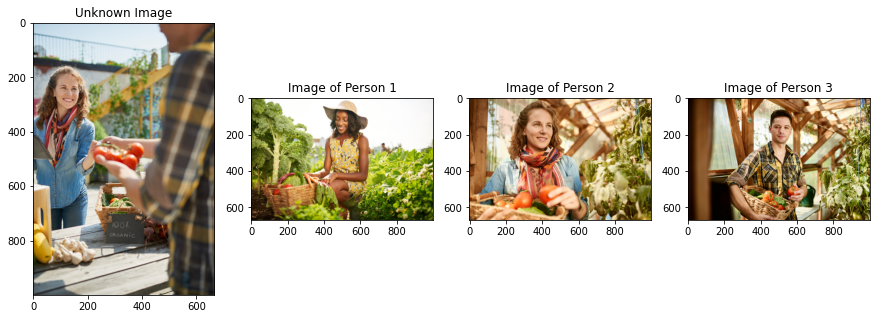

In [38]:
MatchFace(unknown_image1, known_face_encodings, image_of_person_1, image_of_person_2, image_of_person_3)

Found Person 2 in the photo!
Found Person 1 in the photo!
Found Person 3 in the photo!


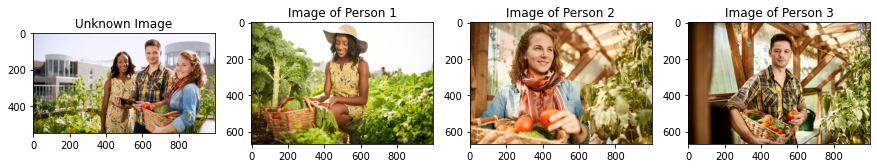

In [39]:
MatchFace(unknown_image2, known_face_encodings, image_of_person_1, image_of_person_2, image_of_person_3)

Found Person 3 in the photo!


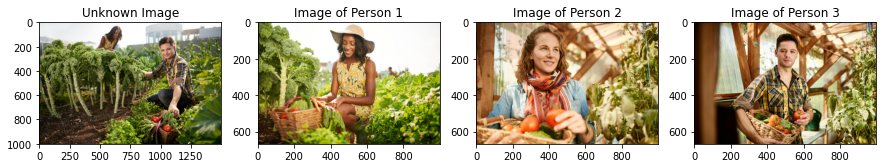

In [40]:
MatchFace(unknown_image3, known_face_encodings, image_of_person_1, image_of_person_2, image_of_person_3)

Found Person 2 in the photo!


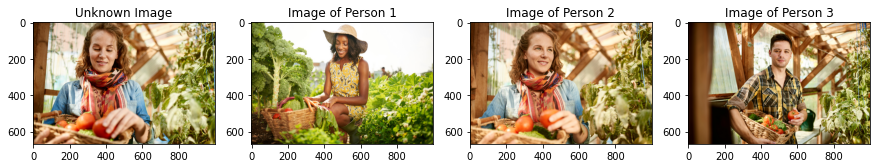

In [41]:
MatchFace(unknown_image4, known_face_encodings, image_of_person_1, image_of_person_2, image_of_person_3)

Found Person 1 in the photo!
Found Person 3 in the photo!


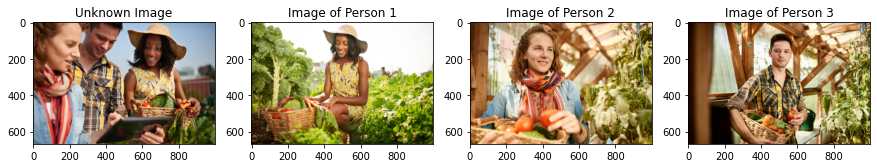

In [47]:
MatchFace(unknown_image5, known_face_encodings, image_of_person_1, image_of_person_2, image_of_person_3)
# Here person two is not found as the face is completely rotated 
# The model is unable to match the encodings for this reason.

Found Person 3 in the photo!


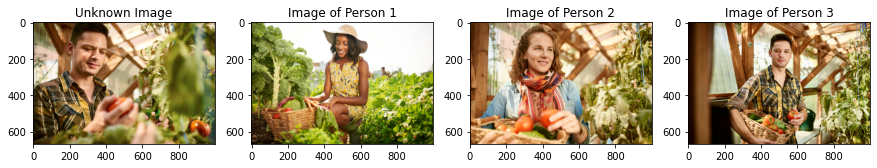

In [42]:
MatchFace(unknown_image6, known_face_encodings, image_of_person_1, image_of_person_2, image_of_person_3)

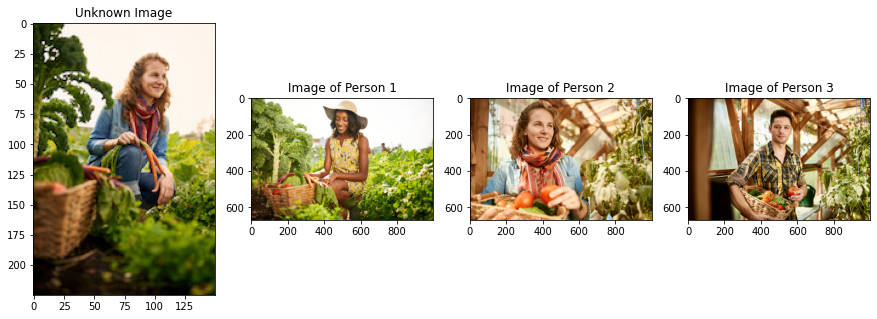

In [49]:
MatchFace(unknown_image7, known_face_encodings, image_of_person_1, image_of_person_2, image_of_person_3)

Here we see that Since the Image is very small the face is not detected.
Hence, we will try to tune the model further to get results for unknown_image7

## Tuning the Face Recognition System

In [43]:
# Modifying the above function
def MatchFace_New(image, known_face_encodings, image1, image2, image3):

    #Face_encodings finds the location of the face and also encodes it
    # We are now breaking it into a two step process
    # We will manually pass the locations as a parameter to the encodings function
    # Since some faces can be small - we will upsample the face when finding the face_locations

    face_locations = face_recognition.face_locations(image, number_of_times_to_upsample=2)
    unknown_face_encoding1 = face_recognition.face_encodings(image, known_face_locations=face_locations)    


    for unknown_face_encoding in unknown_face_encoding1:
        results = face_recognition.compare_faces(known_face_encodings, unknown_face_encoding, tolerance=0.6) 
        name = "Unknown"
        if results[0]:
            name = "Person 1"

        elif results[1]:
            name = "Person 2"

        elif results[2]:
            name = "Person 3"

        print(f"Found {name} in the photo!")

    plt.figure(figsize=(15,5))

    plt.subplot(1,4,1)
    plt.imshow(image)
    plt.title("Unknown Image")

    plt.subplot(1,4,2)
    plt.imshow(image1)
    plt.title("Image of Person 1")

    plt.subplot(1,4,3)
    plt.imshow(image2)
    plt.title("Image of Person 2")

    plt.subplot(1,4,4)
    plt.imshow(image3)
    plt.title("Image of Person 3")


Found Person 2 in the photo!


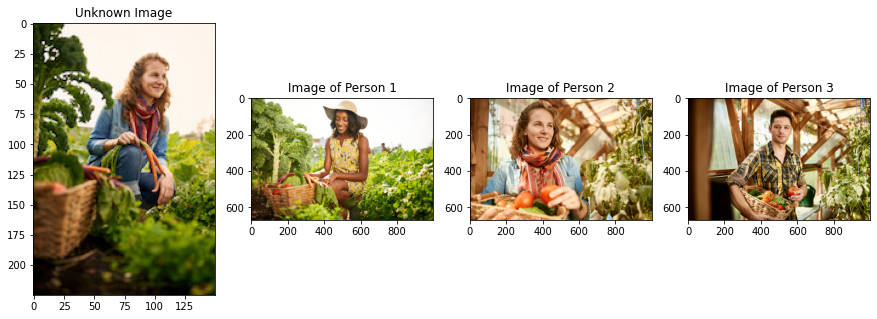

In [45]:
MatchFace_New(unknown_image7, known_face_encodings, image_of_person_1, image_of_person_2, image_of_person_3)

Hence, by Upsampling we were able to detect the face and recognize the face in the image. (unknown image 7)

Face Recognition is usually a trade off between speed and accuracy.
Scaling up the image took a lot of more time and memory - but now it finds faces that were otherwise missed.


## Applying Digital Makeup using Face-Landmarks

On social media applications like Instagram and Snapchat, we have seen we can add silly effects to the picture like you are wearing makeup or hats.
We are creating a very simple version of the same.





In [93]:
image = face_recognition.load_image_file("/content/unknown_2.jpg")

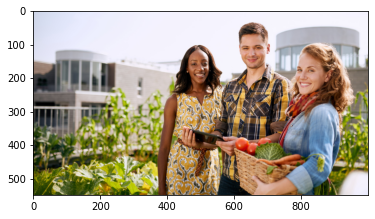

In [94]:
plt.imshow(image)

In [95]:
face_landmarks_list = face_recognition.face_landmarks(image)
# This list will have one entry for each face in the image
# Each entry will be a python dictionary
print(face_landmarks_list[0]['chin'])
# Printing information of chin of the first face detected.

[(785, 183), (783, 191), (782, 200), (784, 209), (788, 218), (791, 227), (794, 237), (798, 246), (805, 250), (817, 250), (829, 246), (842, 240), (855, 232), (864, 222), (868, 208), (871, 195), (872, 182)]


In [96]:
from PIL import Image, ImageDraw
# We have to convert our array of image data into PIL format so that we can draw on top of the image.
pil_image = Image.fromarray(image)

In [97]:
d = ImageDraw.Draw(pil_image, "RGBA")   
# Create a PIL drawing object to be able to draw lines later
# RGBA - means that we want to treat the image like a four-channel Image
# 3 Channels for Red, Green and Blue 
# Extra channel that controls image transparency

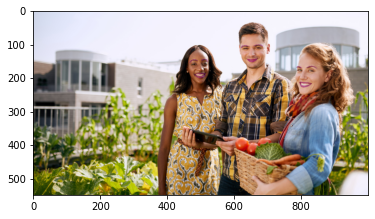

In [98]:
# every iteration gives us the face_landmarks for a face
for face_landmarks in face_landmarks_list:
    # The face_landmark detection model returns these features: 
    #  - chin, left_eyebrow, right_eyebrow, nose_bridge, nose_tip, left_eye, right_eye, top_lip, bottom_lip

    # Draw a line over the eyebrows 
    # d.line() can draw a line if you give it a list of points that it has to follow
    d.line(face_landmarks['left_eyebrow'], fill=(128 ,0 ,128 ,100), width=3)
    d.line(face_landmarks['right_eyebrow'], fill=(128 ,0 ,128 ,100), width=3)
    # Fill parameter is for the colour (R, G, B, Transparency)
    # width given in pixels

    # Draw over the lips
    # Since these filled in polygons we do not need to pass line width
    d.polygon(face_landmarks['top_lip'], fill=(128,0,128,100))
    d.polygon(face_landmarks['bottom_lip'], fill=(128,0,128,100))

plt.imshow(pil_image)

Purple makeup is applied on all the lips and eyebrows

## Finding Look-alikes using Face_Recognition



In [62]:
known_image = face_recognition.load_image_file("/content/test_face.jpg")

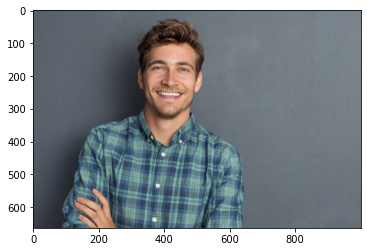

In [63]:
plt.imshow(known_image)

In [64]:
known_image_encoding = face_recognition.face_encodings(known_image)[0] 
# Because we know that there is only face exists

In [65]:
best_face_distance = 1.0
# This will record lowest face_distance recorded 
best_face_image = None

In [66]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [76]:
from pathlib import Path
for image_path in Path("/content/gdrive/MyDrive/Colab Notebooks/people").glob("*.png"):
    
    # Load image to check
    unknown_image = face_recognition.load_image_file(image_path)

    # Get the locations of faces and face encodings for the current image
    face_encodings = face_recognition.face_encodings(unknown_image)

    # Get the face distance between the known person and all the faces in this image
    # Every Image has only one face.
    face_distance = face_recognition.face_distance(face_encodings, known_image_encoding)[0]

    # If this face is more similar to our known image than we've seen so far, save it
    if face_distance < best_face_distance:
        # Save the new best face distance
        best_face_distance = face_distance 

        # Extract a copy of the actual face image itself so that we can display it
        best_face_image = unknown_image

pil_Image = Image.fromarray(best_face_image)


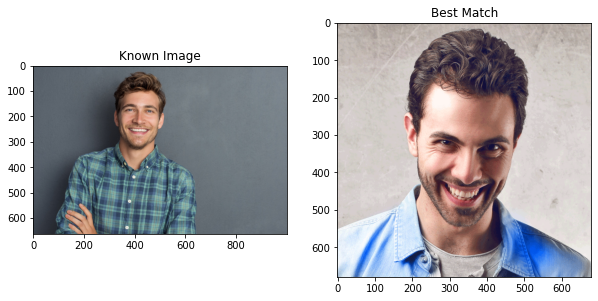

In [77]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
plt.imshow(known_image)
plt.title("Known Image")

plt.subplot(1,2,2)
plt.title("Best Match")
plt.imshow(pil_Image)

## Conclusion: 
    In Conclusion, we can say that we have successfully implemented the basics of face recognition using deep learning.
    We started with Detection, Landmarks and Encodings and we used them to make a facial recognition system.
    We understood importance of upsampling and trade-off between speed and accuracy for face recognition
    We concluded with some applications like digital makeup and finding look-alikes